# 01 - Bezirke und Bevoelkerung

**Ziel:** Bereitet Bezirksgrenzen und Bevoelkerungsdaten als Basisdatensatz auf.

**Inputs:** data/raw/muc_stadtbezirke.geojson, data/raw/bev_stadtbezirke.csv

**Outputs:** data/interim/muc_bezirke_bev_clean.geojson

**Ausfuehrung:** Von oben nach unten ausfuehren (Restart & Run All). Dieses Notebook ist Teil der Pipeline 00 -> 05.


## Setup

In diesem Abschnitt werden die benötigten Bibliotheken importiert und die relevanten Verzeichnispfade gesetzt. Damit ist die technische Grundlage für alle folgenden Schritte vorbereitet.

In [73]:
from pathlib import Path
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Projektpfade zentral definieren (alle weiteren Datei-Zugriffe basieren darauf)
BASE_DIR = Path("..")
RAW_DIR = BASE_DIR / "data" / "raw"
INTERIM_DIR = BASE_DIR / "data" / "interim"
# Standardisierte Output-Ordner für Notebook 01
OUTPUT_DIR = BASE_DIR / "outputs"
FIG_DIR = OUTPUT_DIR / "figures" / "01_bezirke_bevoelkerung"
TABLE_DIR = OUTPUT_DIR / "tables" / "01_bezirke_bevoelkerung"
FIG_DIR.mkdir(parents=True, exist_ok=True)
TABLE_DIR.mkdir(parents=True, exist_ok=True)


## Datenbasis


In diesem Schritt werden die räumlichen Basisdaten für die Analyse eingelesen.  
Die Stadtbezirke werden als GeoJSON (Polygone) geladen, die Bevölkerungszahlen pro Bezirk als CSV-Datei. Beide Datensätze bilden die Grundlage für alle weiteren räumlichen Auswertungen.

In [74]:
# Bezirksgeometrien laden (räumliche Referenz für alle folgenden Joins und Kennzahlen)
gdf_bezirke = gpd.read_file(RAW_DIR / "muc_stadtbezirke.geojson")
print(gdf_bezirke.shape)
gdf_bezirke.head()


(27, 8)


,id,objectid,x,y,sb_nummer,name,flaeche_qm,geometry
0,vablock_stadtbezirke_opendata.1,2,690961.6772,5.337944e+06,04,Schwabing-West,4.363287e+06,"POLYGON ((691821.837 5339259.125, 691767.291 5..."
1,vablock_stadtbezirke_opendata.2,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((685540.466 5327534.649, 685543.41 53..."
2,vablock_stadtbezirke_opendata.3,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((689968.496 5331316.396, 689963.03 53..."
3,vablock_stadtbezirke_opendata.4,13,699191.3166,5.333487e+06,15,Trudering-Riem,2.245392e+07,"POLYGON ((698523.625 5337387.299, 698428.438 5..."
4,vablock_stadtbezirke_opendata.5,24,683362.5274,5.336113e+06,21,Pasing-Obermenzing,1.649754e+07,"POLYGON ((682919.357 5338681.106, 682929.131 5..."


**Erkenntnisse:**
- Die Geometrien wurden erfolgreich geladen und bilden eine vollständige räumliche Basis auf Bezirksebene.
- Die Struktur ist für räumliche Operationen geeignet (Polygon-Geometrien + Bezirksattribute).
- Damit kann die spätere Verknüpfung mit Bevölkerungsdaten konsistent erfolgen.

In [75]:
# Bevölkerungsdaten laden (deutsches Zahlenformat: Komma als Dezimaltrenner)
df_bev = pd.read_csv(RAW_DIR / "bev_stadtbezirke.csv", sep=",", decimal=",")
print(df_bev.shape)
df_bev.head(30)


(26, 7)


,stadtbezirksnummer,stadtbezirk,bevölkerung,bevölkerung in prozent,fläche in ha,fläche in prozent,einwohnerdichte
0,1,Altstadt - Lehel,20876,1.3,314.59,1,66
1,2,Ludwigsvorstadt - Isarvorstadt,50081,3.1,440.17,1.4,114
2,3,Maxvorstadt,52434,3.3,429.82,1.4,122
3,4,Schwabing West,68610,4.3,436.33,1.4,157
4,5,Au - Haidhausen,63972,4,422.00,1.4,152
5,6,Sendling,41002,2.6,393.89,1.3,104
6,7,Sendling - Westpark,62240,3.9,781.49,2.5,80
7,8,Schwanthalerhöhe,28684,1.8,207.03,0.7,139
8,9,Neuhausen - Nymphenburg,101 901,6.4,1291.49,4.2,79
9,10,Moosach,56015,3.5,1109.37,3.6,50


**Erkenntnisse:**
- Die Bevölkerungsdaten wurden vollständig eingelesen und enthalten die erwarteten Schlüsselspalten.
- Die Bezirksnummer liegt als Verknüpfungsschlüssel für den Merge vor.
- Die Tabelle ist damit direkt für die Zusammenführung mit den Geodaten nutzbar.

## Datenaufbereitung


In diesem Abschnitt werden die Datenquellen zusammengeführt und strukturell bereinigt. Dadurch entsteht ein konsistenter Analyse-Datensatz auf Bezirksebene.

### Erster Blick auf die Daten

Zur Plausibilitätsprüfung der Geodaten werden die 25 Münchner Stadtbezirke als Choroplethenkarte visualisiert. Außerdem wird ein Blick auf die ersten Einträge der Bevölkerungsdaten geworfen. Ziel ist es zu prüfen, ob die Daten dem erwarteten Stadtbild entsprechen.

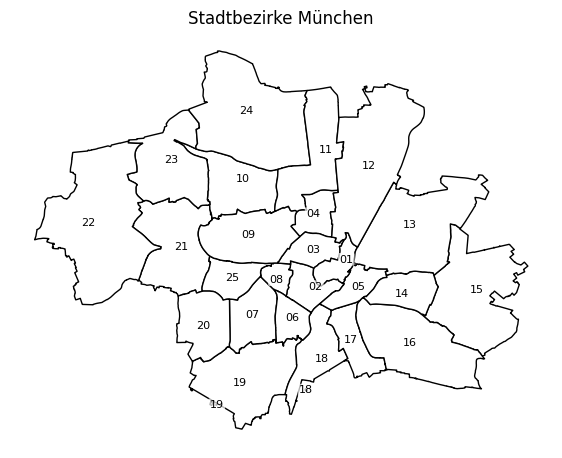

In [76]:
# Stadtbezirke als Referenzkarte visualisieren
ax = gdf_bezirke.plot(edgecolor="black", facecolor="white", figsize=(7, 7))
ax.set_title("Stadtbezirke München")
# Schlüsselspalte robust bestimmen (je nach Datenstand sb_nummer oder bez_nr)
label_col = "sb_nummer" if "sb_nummer" in gdf_bezirke.columns else "bez_nr"
# Bezirksnummern über repräsentative Punkte in den Polygonen platzieren
label_points = gdf_bezirke.geometry.representative_point()
for x, y, sb in zip(label_points.x, label_points.y, gdf_bezirke[label_col]):
    ax.text(
        x,
        y,
        str(sb),
        fontsize=8,
        ha="center",
        va="center",
        color="black",
        bbox=dict(
            facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.12"
        ),
    )
plt.axis("off")
plt.savefig(FIG_DIR / "01_bezirkskarte.png", dpi=180, bbox_inches="tight")
plt.show()


**Erkenntnisse:**
- Die Bezirksgrenzen sind räumlich plausibel und decken das Stadtgebiet lückenlos ab.
- Die Karte bestätigt die Eignung der Geodaten für die Bezirksanalyse.
- Es ist erkennbar dass bei den Bezirken 18 & 19 Handlungsbedarf besteht

In [77]:
# Bevölkerungsdaten
df_bev.head()


,stadtbezirksnummer,stadtbezirk,bevölkerung,bevölkerung in prozent,fläche in ha,fläche in prozent,einwohnerdichte
0,1,Altstadt - Lehel,20876,1.3,314.59,1,66
1,2,Ludwigsvorstadt - Isarvorstadt,50081,3.1,440.17,1.4,114
2,3,Maxvorstadt,52434,3.3,429.82,1.4,122
3,4,Schwabing West,68610,4.3,436.33,1.4,157
4,5,Au - Haidhausen,63972,4,422.00,1.4,152


**Erkenntnisse:**
- Die Bevölkerungswerte sind je Bezirk eindeutig strukturiert.
- Die Bezirksnummer kann als stabiler Join-Key verwendet werden.
- Inhaltlich sind die Daten ausreichend für die Kennzahlenbildung auf Bezirksebene.

### Merging Stadtbezirke + Bevölkerung

In diesem Abschnitt werden Geodaten und Bevölkerungsdaten über die Bezirksnummer verknüpft. Das Ergebnis ist ein gemeinsamer Datensatz für räumliche und statistische Analysen.

Die Geometrien der Stadtbezirke werden über die Bezirksnummer (`bez_nr`) mit den Bevölkerungsdaten verknüpft. Ziel ist ein gemeinsamer GeoDataFrame, der sowohl die räumlichen Informationen als auch Einwohnerzahlen pro Bezirk enthält.

In [78]:
# Arbeitskopien erzeugen, um Originaldaten unverändert zu lassen
gdf = gdf_bezirke.copy()
dfb = df_bev.copy()

# Join-Schlüssel in beiden Tabellen auf denselben numerischen Typ bringen
gdf["bez_nr"] = gdf["sb_nummer"].astype(int)
dfb["bez_nr"] = dfb["stadtbezirksnummer"].astype(int)

# Kurzcheck: Sind die Bezirksnummern beider Quellen deckungsgleich?
print(sorted(gdf["bez_nr"].unique()))
print(sorted(dfb["bez_nr"].unique()))


[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25)]
[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26)]


In [79]:
# Bezirksgeometrien mit Bevölkerungsdaten verknüpfen
gdf_merged = gdf.merge(
    dfb,
    on="bez_nr",
    how="left",  # alle Bezirke behalten, auch falls ein Datenpunkt fehlt
)

# Struktur des gemergten GeoDataFrames prüfen
print(gdf_merged.shape)
gdf_merged.head()


(27, 16)


,id,objectid,x,y,sb_nummer,name,flaeche_qm,geometry,bez_nr,stadtbezirksnummer,stadtbezirk,bevölkerung,bevölkerung in prozent,fläche in ha,fläche in prozent,einwohnerdichte
0,vablock_stadtbezirke_opendata.1,2,690961.6772,5.337944e+06,04,Schwabing-West,4.363287e+06,"POLYGON ((691821.837 5339259.125, 691767.291 5...",4,4,Schwabing West,68610,4.3,436.33,1.4,157
1,vablock_stadtbezirke_opendata.2,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((685540.466 5327534.649, 685543.41 53...",19,19,Thalkirchen - Obersendling - Forstenried - Für...,103717,6.5,1776.35,5.7,58
2,vablock_stadtbezirke_opendata.3,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((689968.496 5331316.396, 689963.03 53...",19,19,Thalkirchen - Obersendling - Forstenried - Für...,103717,6.5,1776.35,5.7,58
3,vablock_stadtbezirke_opendata.4,13,699191.3166,5.333487e+06,15,Trudering-Riem,2.245392e+07,"POLYGON ((698523.625 5337387.299, 698428.438 5...",15,15,Trudering - Riem,76280,4.8,2245.39,7.2,34
4,vablock_stadtbezirke_opendata.5,24,683362.5274,5.336113e+06,21,Pasing-Obermenzing,1.649754e+07,"POLYGON ((682919.357 5338681.106, 682929.131 5...",21,21,Pasing - Obermenzing,81804,5.1,1649.75,5.3,50


**Erkenntnisse:**
- Der Merge verbindet Geometrie und Bevölkerungsdaten erfolgreich in einem gemeinsamen Datensatz.
- Die räumliche und sachliche Information liegt damit konsistent auf derselben Granularität vor.
- Das ist die zentrale Grundlage für Bereinigung, Visualisierung und Export.

### Bereinigung

In diesem Abschnitt werden relevante Spalten ausgewählt, Datentypen korrigiert und mögliche Duplikate behandelt. Ziel ist ein sauberer, belastbarer Arbeitsdatensatz.

In [80]:
# Auf analyserelevante Spalten reduzieren und konsistent benennen
gdf_work = gdf_merged[
    [
        "bez_nr",
        "name",
        "stadtbezirk",
        "bevölkerung",
        "fläche in ha",
        "einwohnerdichte",
        "geometry",
    ]
].rename(
    columns={
        "bevölkerung": "einwohner",
        "fläche in ha": "flaeche_ha",
    }
)


In [81]:
gdf_work = gdf_work.sort_values("bez_nr").reset_index(drop=True)
gdf_work.head(30)


,bez_nr,name,stadtbezirk,einwohner,flaeche_ha,einwohnerdichte,geometry
0,1,Altstadt-Lehel,Altstadt - Lehel,20876,314.59,66,"POLYGON ((692704.77 5336941.154, 692682.921 53..."
1,2,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt - Isarvorstadt,50081,440.17,114,"POLYGON ((689722.841 5335359.37, 689570.385 53..."
2,3,Maxvorstadt,Maxvorstadt,52434,429.82,122,"POLYGON ((690674.877 5336921.715, 690657.282 5..."
3,4,Schwabing-West,Schwabing West,68610,436.33,157,"POLYGON ((691821.837 5339259.125, 691767.291 5..."
4,5,Au-Haidhausen,Au - Haidhausen,63972,422.00,152,"POLYGON ((693021.981 5335306.773, 693021.084 5..."
5,6,Sendling,Sendling,41002,393.89,104,"POLYGON ((688743.237 5333793.444, 688732.857 5..."
6,7,Sendling-Westpark,Sendling - Westpark,62240,781.49,80,"POLYGON ((687931.605 5334552.238, 687876.365 5..."
7,8,Schwanthalerhöhe,Schwanthalerhöhe,28684,207.03,139,"POLYGON ((689091.353 5335270.96, 688991.703 53..."
8,9,Neuhausen-Nymphenburg,Neuhausen - Nymphenburg,101 901,1291.49,79,"POLYGON ((689485.672 5338343.264, 689471.049 5..."
9,10,Moosach,Moosach,56015,1109.37,50,"POLYGON ((683486.613 5341924.198, 683481.27 53..."


In [82]:
# Prüfen, ob bez_nr mehrfach vorkommt (potenzielle Geometrie-Splits)
gdf_work[gdf_work["bez_nr"].duplicated(keep=False)].sort_values("bez_nr")


,bez_nr,name,stadtbezirk,einwohner,flaeche_ha,einwohnerdichte,geometry
17,18,Untergiesing-Harlaching,Untergiesing - Harlaching,54067,805.72,67,"POLYGON ((690447.74 5328289.784, 690497.261 53..."
18,18,Untergiesing-Harlaching,Untergiesing - Harlaching,54067,805.72,67,"POLYGON ((691220.643 5333055.074, 691217.702 5..."
19,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,Thalkirchen - Obersendling - Forstenried - Für...,103717,1776.35,58,"POLYGON ((685540.466 5327534.649, 685543.41 53..."
20,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,Thalkirchen - Obersendling - Forstenried - Für...,103717,1776.35,58,"POLYGON ((689968.496 5331316.396, 689963.03 53..."


In [83]:
# Aggregationsregeln für die Duplikat-Konsolidierung definieren
agg_dict = {
    "name": "first",
    "stadtbezirk": "first",
    "einwohner": "first",
    "flaeche_ha": "first",
    "einwohnerdichte": "first",
}

# Duplikate je bez_nr geometrisch zusammenführen (dissolve)
gdf_clean = gdf_work.dissolve(by="bez_nr", aggfunc=agg_dict).reset_index()

# Plausibilitätscheck: genau ein Datensatz pro Bezirk
gdf_clean["bez_nr"].value_counts().max(), gdf_clean.shape


(np.int64(1), (25, 7))

**Erkenntnisse (Duplikate):**
- Bei der Prüfung wurden doppelte Einträge für `bez_nr` identifiziert.
- Die Duplikate wurden über klare Aggregationsregeln zusammengeführt (`first` für stabile Bezirksattribute).
- Dadurch liegt anschließend wieder genau ein konsistenter Datensatz je Bezirk vor.

In [84]:
# Datentypen anzeigen
gdf_clean.dtypes


bez_nr                int64
geometry           geometry
name                 object
stadtbezirk          object
einwohner            object
flaeche_ha           object
einwohnerdichte       int64
dtype: object

In [85]:
# Zahlformate robust konvertieren (z. B. "1.234,56" -> 1234.56)
def parse_mixed_number(series):
    s = series.astype(str).str.strip().str.replace(" ", "", regex=False)
    both = s.str.contains(r"\.") & s.str.contains(",")
    comma_only = s.str.contains(",") & ~s.str.contains(r"\.")
    # Fall 1: 1.234,56 -> 1234.56
    s = s.where(
        ~both, s.str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
    )
    # Fall 2: 1234,56 -> 1234.56
    s = s.where(~comma_only, s.str.replace(",", ".", regex=False))
    # Fall 3: 1234.56 bleibt unverändert
    return s.astype("float64")


# Relevante Kennzahlen in numerische Typen überführen
gdf_clean["einwohner"] = parse_mixed_number(gdf_clean["einwohner"]).astype("int64")
gdf_clean["flaeche_ha"] = parse_mixed_number(gdf_clean["flaeche_ha"])
gdf_clean["einwohnerdichte"] = parse_mixed_number(gdf_clean["einwohnerdichte"])

# Datentypen nach der Konvertierung prüfen
gdf_clean.dtypes


bez_nr                int64
geometry           geometry
name                 object
stadtbezirk          object
einwohner             int64
flaeche_ha          float64
einwohnerdichte     float64
dtype: object

In [86]:
# Gesamteinwohner als einfacher Summen-Plausibilitätscheck
gdf_clean["einwohner"].sum()


np.int64(1603776)

## Explorative Analyse

In diesem Abschnitt wird die Verteilung zentraler Kennzahlen explorativ untersucht. Damit werden Muster, Ausreißer und Unterschiede zwischen Bezirken sichtbar.

### Deskriptive Statistik

In diesem Abschnitt werden Struktur, Umfang und Verteilungskennzahlen des bereinigten Datensatzes zusammengefasst. Das liefert eine kompakte Qualitäts- und Plausibilitätsprüfung.

In [87]:
gdf_clean.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bez_nr           25 non-null     int64   
 1   geometry         25 non-null     geometry
 2   name             25 non-null     object  
 3   stadtbezirk      25 non-null     object  
 4   einwohner        25 non-null     int64   
 5   flaeche_ha       25 non-null     float64 
 6   einwohnerdichte  25 non-null     float64 
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 1.5+ KB


**Erkenntnisse:**
- Spaltenstruktur und Datentypen sind konsistent für die folgenden Analyseschritte.
- Der Datensatz ist technisch sauber vorbereitet für Statistik und Karten.
- Kritische Strukturprobleme sind in der Übersicht nicht erkennbar.

In [88]:
gdf_clean.shape


(25, 7)

Erkenntnis: Die Datensatzgröße ist erwartungskonform und deckt die 25 Bezirke vollständig ab.

In [89]:
# Deskriptive Statistik für zentrale Kennzahlen erzeugen und speichern
desc_stats = gdf_clean.describe()
desc_stats.to_csv(TABLE_DIR / "01_deskriptive_statistik.csv")
desc_stats


,bez_nr,einwohner,flaeche_ha,einwohnerdichte
count,25.000000,25.00000,25.000000,25.000000
mean,13.000000,64151.04000,1242.916000,74.320000
std,7.359801,23755.12693,905.805858,40.343029
min,1.000000,20876.00000,207.030000,18.000000
25%,7.000000,51637.00000,440.170000,50.000000
50%,13.000000,61011.00000,922.380000,66.000000
75%,19.000000,77092.00000,1776.350000,104.000000
max,25.000000,120776.00000,3405.730000,157.000000


**Erkenntnisse:**
- Die Kennzahlen zeigen deutliche Unterschiede zwischen den Bezirken.
- Es gibt klare Spannweiten bei Einwohnerzahl und Dichte, was räumliche Heterogenität bestätigt.
- Eine vergleichende Bezirksanalyse ist damit fachlich sinnvoll.

In [90]:
# Fehlende Werte je Spalte prüfen und als Tabelle speichern
missing_values = gdf_clean.isnull().sum().rename("missing_count")
missing_values.to_frame().to_csv(TABLE_DIR / "02_missing_values.csv")
missing_values


bez_nr             0
geometry           0
name               0
stadtbezirk        0
einwohner          0
flaeche_ha         0
einwohnerdichte    0
Name: missing_count, dtype: int64

### Verteilung Einwohnerzahl & Einwohnerdichte

In diesem Abschnitt werden Verteilungen über Histogramme dargestellt. So wird sichtbar, wie stark sich Bezirke in Größe und Dichte unterscheiden.

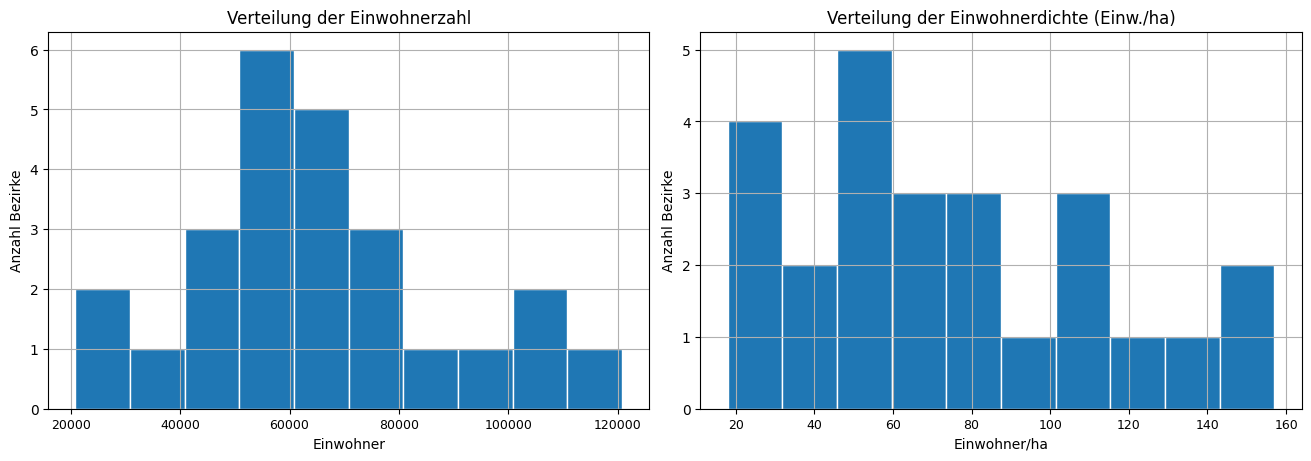

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4.5), constrained_layout=True)
# Verteilung der absoluten Einwohnerzahl
gdf_clean["einwohner"].hist(bins=10, ax=axes[0], edgecolor="white")
axes[0].set_title("Verteilung der Einwohnerzahl")
axes[0].set_xlabel("Einwohner")
axes[0].set_ylabel("Anzahl Bezirke")
axes[0].tick_params(axis="x", labelsize=9)
# Verteilung der Einwohnerdichte (vergleichbar über Bezirksgrößen)
gdf_clean["einwohnerdichte"].hist(bins=10, ax=axes[1], edgecolor="white")
axes[1].set_title("Verteilung der Einwohnerdichte (Einw./ha)")
axes[1].set_xlabel("Einwohner/ha")
axes[1].set_ylabel("Anzahl Bezirke")
axes[1].tick_params(axis="x", labelsize=9)
plt.savefig(FIG_DIR / "02_hist_einwohner_und_dichte.png", dpi=180, bbox_inches="tight")
plt.show()


**Erkenntnisse:**
- Die Einwohnerzahl streut stark: von **20.876** (Altstadt-Lehel) bis **120.776** (Ramersdorf-Perlach), Median **61.011**.
- Auch die Dichte variiert deutlich: von **18 Ew/ha** (Aubing-Lochhausen-Langwied) bis **157 Ew/ha** (Schwabing-West), Median **66 Ew/ha**.
- Die Verteilungen sind damit klar heterogen; Mittelwerte (Einwohner **64.151**, Dichte **74,3 Ew/ha**) liegen sichtbar über den Medianen.

### Choropletenkarten

In diesem Abschnitt werden räumliche Muster kartografisch dargestellt. Dadurch werden lokale Konzentrationen und räumliche Unterschiede unmittelbar erkennbar.

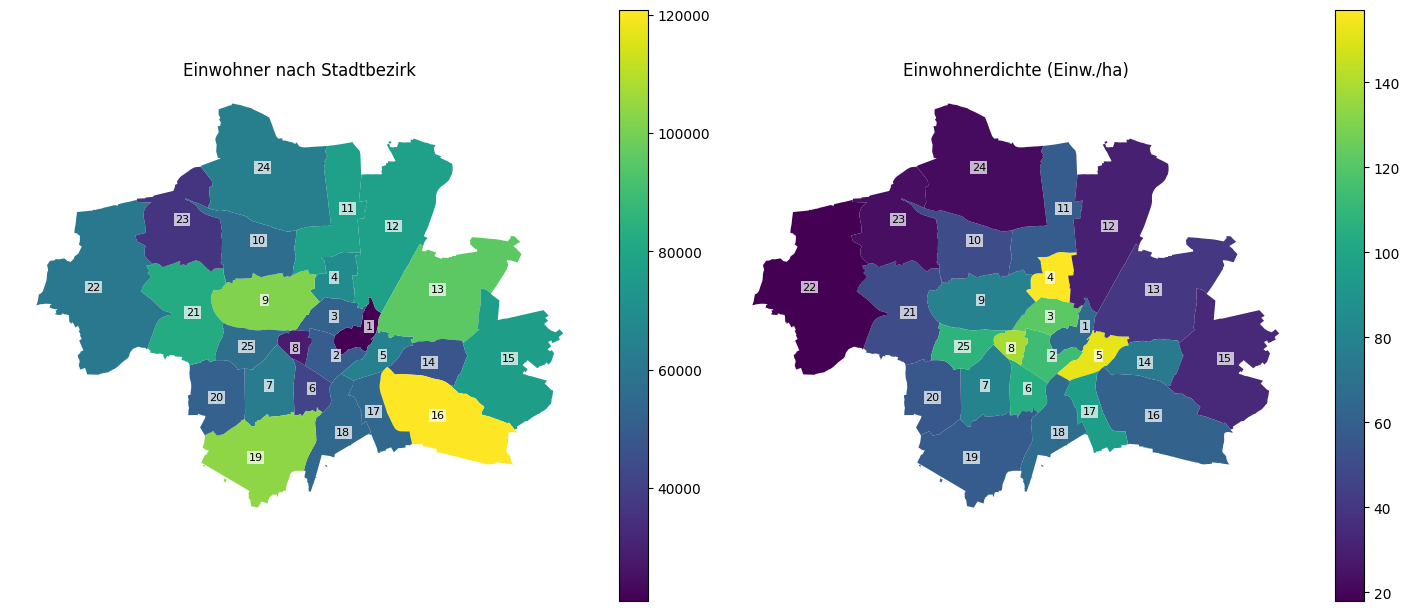

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)
# Choropleth 1: absolute Einwohnerzahlen
gdf_clean.plot(column="einwohner", legend=True, ax=axes[0])
axes[0].set_title("Einwohner nach Stadtbezirk")
axes[0].axis("off")
# Choropleth 2: Einwohnerdichte
gdf_clean.plot(column="einwohnerdichte", legend=True, ax=axes[1])
axes[1].set_title("Einwohnerdichte (Einw./ha)")
axes[1].axis("off")
# Bezirksnummern auf beiden Karten ergänzen
label_col = "sb_nummer" if "sb_nummer" in gdf_clean.columns else "bez_nr"
for ax in axes:
    for _, row in gdf_clean.iterrows():
        rp = row.geometry.representative_point()
        ax.text(
            rp.x,
            rp.y,
            str(row[label_col]),
            fontsize=8,
            ha="center",
            va="center",
            color="black",
            bbox={"facecolor": "white", "alpha": 0.7, "edgecolor": "none", "pad": 1},
        )
plt.savefig(
    FIG_DIR / "03_choropleth_einwohner_und_dichte.png", dpi=180, bbox_inches="tight"
)
plt.show()


**Erkenntnisse:**
- Die Choroplethen zeigen räumliche Konzentrationen: sehr hohe Dichten u. a. in **Schwabing-West (157 Ew/ha)** und **Au-Haidhausen (152 Ew/ha)**.
- Große absolute Bevölkerungen liegen u. a. in **Ramersdorf-Perlach (120.776)** sowie **Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln (103.717)**.
- Das bestätigt: hohe Bevölkerung und hohe Dichte fallen nicht immer in denselben Bezirken zusammen.

### Bevölkerung & Dichte sortiert

In diesem Abschnitt werden Bezirke nach Einwohnerzahl und Dichte sortiert verglichen. Das erleichtert die Identifikation von Extremwerten im Bezirksranking.

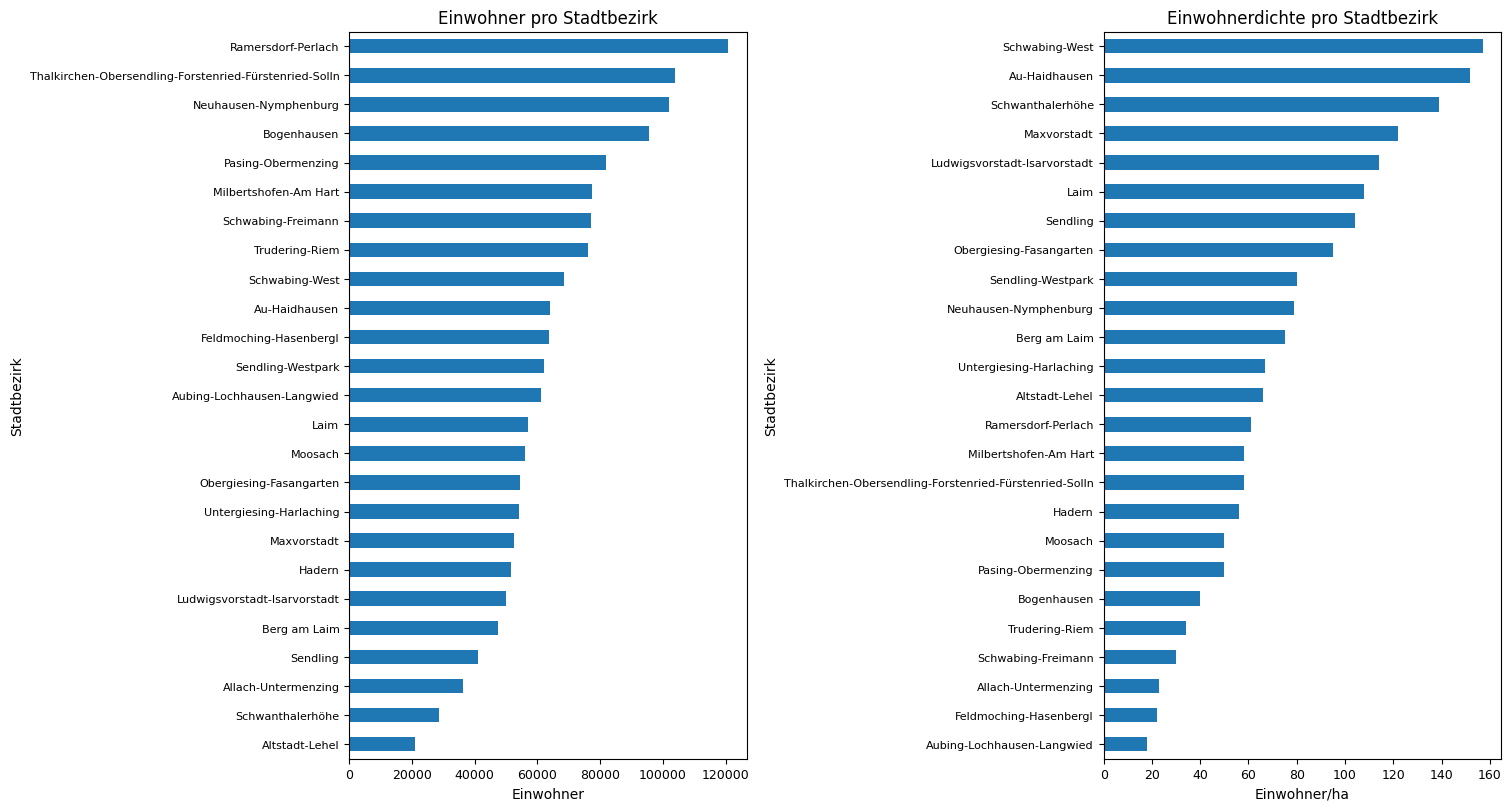

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True)
# Bezirke nach Einwohnerzahl sortieren (horizontale Lesbarkeit bei langen Namen)
df_bar_einw = gdf_clean[["name", "einwohner"]].sort_values("einwohner", ascending=True)
df_bar_einw.plot(kind="barh", x="name", y="einwohner", legend=False, ax=axes[0])
axes[0].set_xlabel("Einwohner")
axes[0].set_ylabel("Stadtbezirk")
axes[0].set_title("Einwohner pro Stadtbezirk")
axes[0].tick_params(axis="y", labelsize=8)
axes[0].tick_params(axis="x", labelsize=9)
# Bezirke nach Einwohnerdichte sortieren
df_bar_dichte = gdf_clean[["name", "einwohnerdichte"]].sort_values(
    "einwohnerdichte", ascending=True
)
df_bar_dichte.plot(kind="barh", x="name", y="einwohnerdichte", legend=False, ax=axes[1])
axes[1].set_xlabel("Einwohner/ha")
axes[1].set_ylabel("Stadtbezirk")
axes[1].set_title("Einwohnerdichte pro Stadtbezirk")
axes[1].tick_params(axis="y", labelsize=8)
axes[1].tick_params(axis="x", labelsize=9)
# Rankings als Tabelle exportieren
df_bar_einw.to_csv(TABLE_DIR / "03_ranking_einwohner.csv", index=False)
df_bar_dichte.to_csv(TABLE_DIR / "04_ranking_einwohnerdichte.csv", index=False)
plt.savefig(FIG_DIR / "04_barh_einwohner_und_dichte.png", dpi=180, bbox_inches="tight")
plt.show()


**Erkenntnisse:**
- Im Bevölkerungsranking führen **Ramersdorf-Perlach (120.776)**, **Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln (103.717)** und **Neuhausen-Nymphenburg (101.901)**.
- Am unteren Ende liegen **Altstadt-Lehel (20.876)**, **Schwanthalerhöhe (28.684)** und **Allach-Untermenzing (36.230)**.
- Beim Dichte-Ranking führen **Schwabing-West (157 Ew/ha)**, **Au-Haidhausen (152 Ew/ha)**, **Schwanthalerhöhe (139 Ew/ha)**; Schlusslichter sind **Aubing-Lochhausen-Langwied (18 Ew/ha)**, **Feldmoching-Hasenbergl (22 Ew/ha)**, **Allach-Untermenzing (23 Ew/ha)**.

### Boxplots: Verteilung Einwohnerzahl & Einwohnerdichte

In diesem Abschnitt werden Lage und Streuung mit Boxplots zusammengefasst. Damit lassen sich Median, Spannweite und Ausreißer kompakt vergleichen.

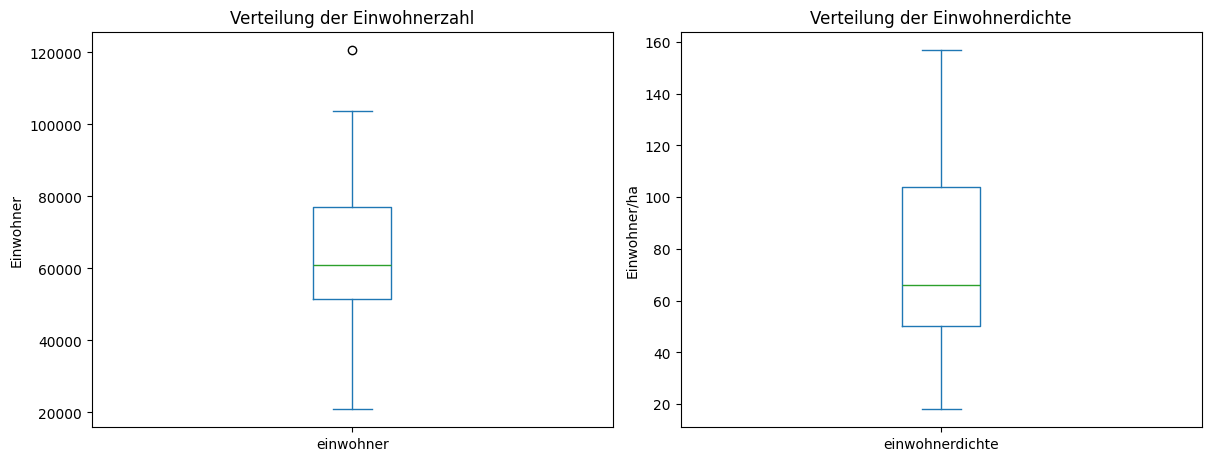

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5), constrained_layout=True)
# Boxplot: Verteilung der Einwohnerzahlen
gdf_clean[["einwohner"]].plot(kind="box", ax=axes[0])
axes[0].set_title("Verteilung der Einwohnerzahl")
axes[0].set_ylabel("Einwohner")
# Boxplot: Verteilung der Einwohnerdichte
gdf_clean[["einwohnerdichte"]].plot(kind="box", ax=axes[1])
axes[1].set_title("Verteilung der Einwohnerdichte")
axes[1].set_ylabel("Einwohner/ha")
plt.savefig(
    FIG_DIR / "05_boxplot_einwohner_und_dichte.png", dpi=180, bbox_inches="tight"
)
plt.show()


**Erkenntnisse:**
- Die Boxplots bestätigen breite Streuung: IQR bei Einwohnerzahl von **51.637** bis **77.092**, bei Dichte von **50** bis **104 Ew/ha**.
- Deutliche Extrembereiche sind sichtbar (z. B. **Ramersdorf-Perlach** bei Einwohnerzahl und **Schwabing-West** bei Dichte).
- Die Kombination aus Quartilen und Ausreißern unterstreicht die starke strukturelle Unterschiedlichkeit der Bezirke.

## Plausibilitätscheck 



In diesem Abschnitt wird geprüft, ob Struktur und zentrale Kennzahlen konsistent sind. Das dient als Qualitätssicherung vor dem Export.

In [95]:
# Erwartete Mindeststruktur für den Export
required_cols = [
    "bez_nr",
    "name",
    "einwohner",
    "flaeche_ha",
    "einwohnerdichte",
    "geometry",
]
missing_cols = [c for c in required_cols if c not in gdf_clean.columns]
assert not missing_cols, f"Fehlende Spalten: {missing_cols}"

# Schlüssel- und Vollständigkeitsprüfungen
assert len(gdf_clean) == 25, f"Erwartet 25 Bezirke, gefunden: {len(gdf_clean)}"
assert gdf_clean["bez_nr"].is_unique, "bez_nr ist nicht eindeutig"
assert gdf_clean["bez_nr"].notna().all(), "bez_nr enthaelt Nullwerte"

# Plausible Wertebereiche
assert (gdf_clean["einwohner"] > 0).all(), "einwohner <= 0 gefunden"
assert (gdf_clean["flaeche_ha"] > 0).all(), "flaeche_ha <= 0 gefunden"
assert (gdf_clean["einwohnerdichte"] > 0).all(), "einwohnerdichte <= 0 gefunden"

# Dichte-Konsistenz: einwohnerdichte als Einw./ha, flaeche_ha als ha
calc_density_ha = gdf_clean["einwohner"] / gdf_clean["flaeche_ha"]
abs_diff = (calc_density_ha - gdf_clean["einwohnerdichte"]).abs()
rel_diff = abs_diff / gdf_clean["einwohnerdichte"]
max_abs = float(abs_diff.max())
max_rel = float(rel_diff.max())
mean_rel = float(rel_diff.mean())

# Toleranz für Rundung/Quellunterschiede
assert max_rel < 0.05, (
    "Dichteabweichung zu hoch: "
    f"max_abs={max_abs:.3f}, max_rel={max_rel:.3%}, mean_rel={mean_rel:.3%}"
)
print(
    "Checks OK | "
    f"max_abs={max_abs:.3f}, "
    f"max_rel={max_rel:.3%}, "
    f"mean_rel={mean_rel:.3%}"
)


Checks OK | max_abs=0.493, max_rel=1.948%, mean_rel=0.379%


## Export

Der bereinigte Stadtbezirks-Datensatz wird als `muc_bezirke_bev_clean.geojson` im Ordner `data/interim/` gespeichert und in den Folgeschritten weiterverwendet.


In diesem Abschnitt wird der bereinigte Datensatz für die weiteren Notebooks gespeichert. Damit wird die Pipeline reproduzierbar fortgesetzt.

In [96]:
# Ausgabeordner sicherstellen und bereinigten Bezirksdatensatz speichern
INTERIM_DIR.mkdir(parents=True, exist_ok=True)
out_path = INTERIM_DIR / "muc_bezirke_bev_clean.geojson"
gdf_clean.to_file(out_path, driver="GeoJSON")
# Tabellarische Exportversion für Bericht und Nachnutzung speichern
gdf_clean.drop(columns="geometry").to_csv(
    TABLE_DIR / "05_muc_bezirke_bev_clean.csv", index=False
)
out_path


PosixPath('../data/interim/muc_bezirke_bev_clean.geojson')

**Erkenntnisse:**
- Der bereinigte Datensatz wurde erfolgreich in das Interim-Verzeichnis exportiert.
- Die Datei kann direkt in den Folgeschritten der Pipeline weiterverwendet werden.
- Damit ist die Reproduzierbarkeit zwischen den Notebooks sichergestellt.